In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree, preprocessing

In [2]:
dataset = "dataset.csv"
data = pd.read_csv(dataset)

In [3]:
data

,License,Drunk,Tired,Healthy,God,Deposit,Glasses,Clothes Color,Weight,Eat Beef,...,Hair,Watch,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Predict Class
0,True,False,False,False,False,747523,True,Yellow,Fat,False,...,Long,False,True,True,True,True,True,False,False,True
1,True,True,True,True,False,196880,True,Purple,Thin,True,...,No,False,False,True,False,False,False,False,False,True
2,True,True,False,True,False,893295,False,Green,Thin,True,...,Long,True,True,True,True,True,True,True,False,True
3,False,False,False,True,False,936356,True,Blue,Normal,False,...,No,False,True,True,True,True,False,True,False,False
4,True,True,False,True,False,122576,True,Red,Normal,False,...,Short,True,True,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,False,False,True,True,402166,True,Blue,Normal,True,...,No,False,True,False,True,False,True,False,False,True
496,True,False,False,False,False,730655,True,White,Normal,False,...,No,True,True,False,False,True,True,True,True,True
497,True,True,True,True,False,945037,True,White,Normal,True,...,Long,False,True,True,True,False,False,False,False,True
498,True,True,False,True,False,547007,False,Red,Thin,False,...,Long,False,True,False,False,True,False,True,False,True


In [4]:
columns = list(data.columns)
encoder_cols = list(columns)
encoder_cols.remove("Deposit")

In [5]:
labelencoder = preprocessing.LabelEncoder()
for col in encoder_cols:
    data[col] = labelencoder.fit_transform(data[col])

In [6]:
data

,License,Drunk,Tired,Healthy,God,Deposit,Glasses,Clothes Color,Weight,Eat Beef,...,Hair,Watch,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Predict Class
0,1,0,0,0,0,747523,1,6,0,0,...,0,0,1,1,1,1,1,0,0,1
1,1,1,1,1,0,196880,1,3,2,1,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,1,0,893295,0,2,2,1,...,0,1,1,1,1,1,1,1,0,1
3,0,0,0,1,0,936356,1,1,1,0,...,1,0,1,1,1,1,0,1,0,0
4,1,1,0,1,0,122576,1,4,1,0,...,2,1,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,1,1,402166,1,1,1,1,...,1,0,1,0,1,0,1,0,0,1
496,1,0,0,0,0,730655,1,5,1,0,...,1,1,1,0,0,1,1,1,1,1
497,1,1,1,1,0,945037,1,5,1,1,...,0,0,1,1,1,0,0,0,0,1
498,1,1,0,1,0,547007,0,4,2,0,...,0,0,1,0,0,1,0,1,0,1


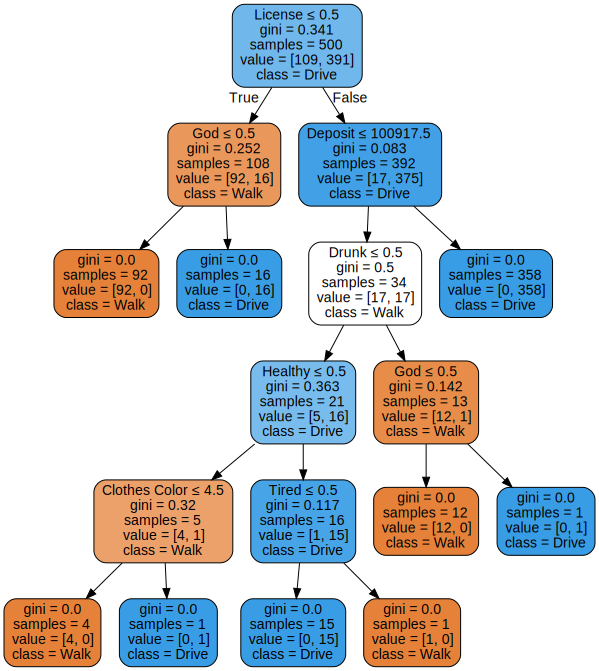

In [7]:
clf = tree.DecisionTreeClassifier(criterion="gini").fit(data[columns[:-1]], data[columns[-1]])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=columns[:-1], class_names=["Walk", "Drive"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph